In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
%matplotlib inline
import imp
plt.style.use('seaborn-darkgrid')
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from numpy.linalg import svd
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF
from os import listdir
import warnings
from xgboost import XGBRFClassifier
import tensorflow as tf
warnings.filterwarnings('ignore')

In [3]:
import src.LC_Clean_Assist as LCC
import src.LC_Plotter as LCP
import src.LC_Transformer as LCT
import src.LC_Models as LCM
imp.reload(LCP)
imp.reload(LCC)
imp.reload(LCT)
imp.reload(LCM);

In [4]:
df=pd.read_csv('data/cleaned_data.csv');


In [5]:
scaled_df = LCT.lc_transform(df);

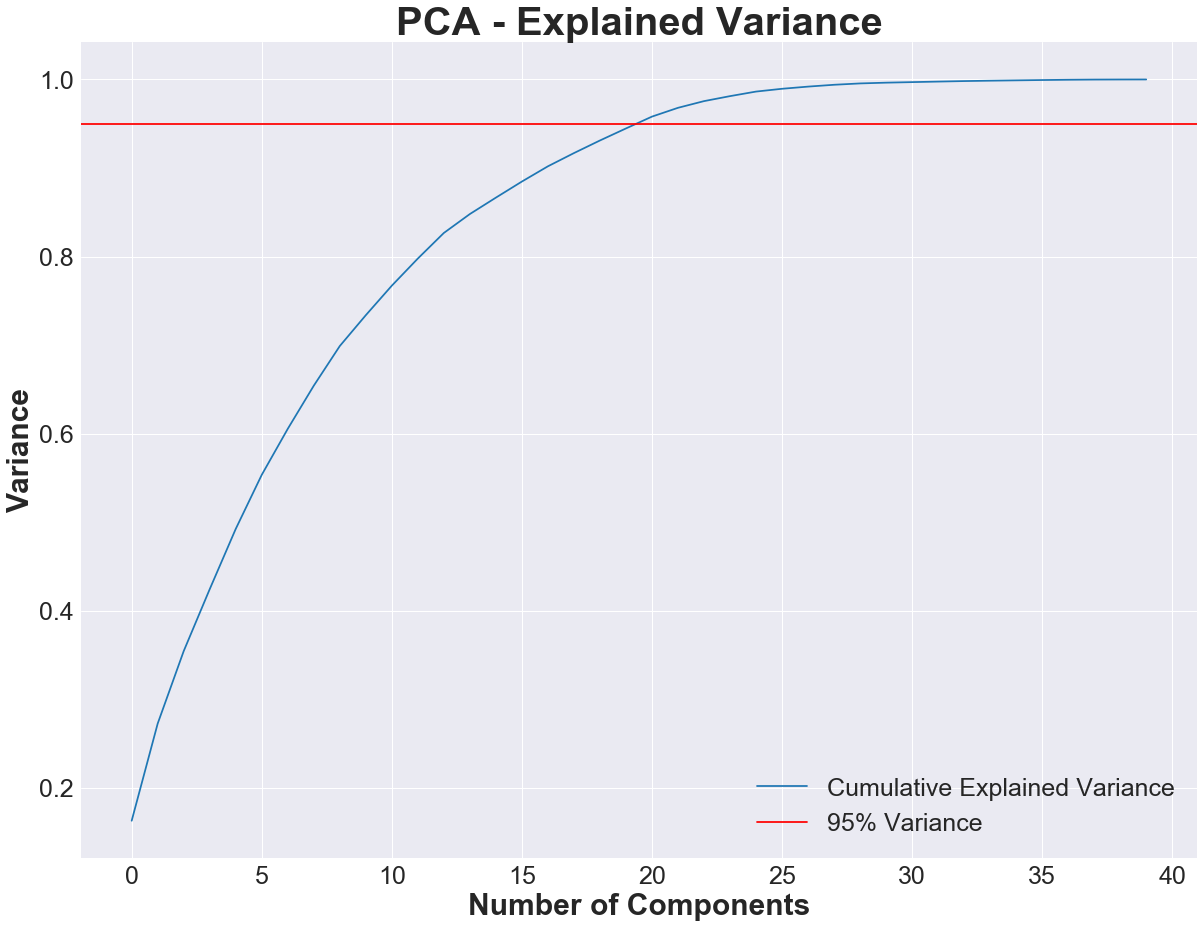

In [9]:
imp.reload(LCP)
LCP.pca_plotter(scaled_df)

In [ ]:
pca_df = LCT.get_pca_df(scaled_df,20)

In [161]:
logm_optimized = pd.read_csv('models/logm_optimized.csv')
rfc_optimized = pd.read_csv('models/rfc_optimized.csv')
gbc_df = pd.read_csv('models/gbc_optimized.csv')

In [162]:
combined = pd.concat([logm_optimized,rfc_optimized,gbc_df])

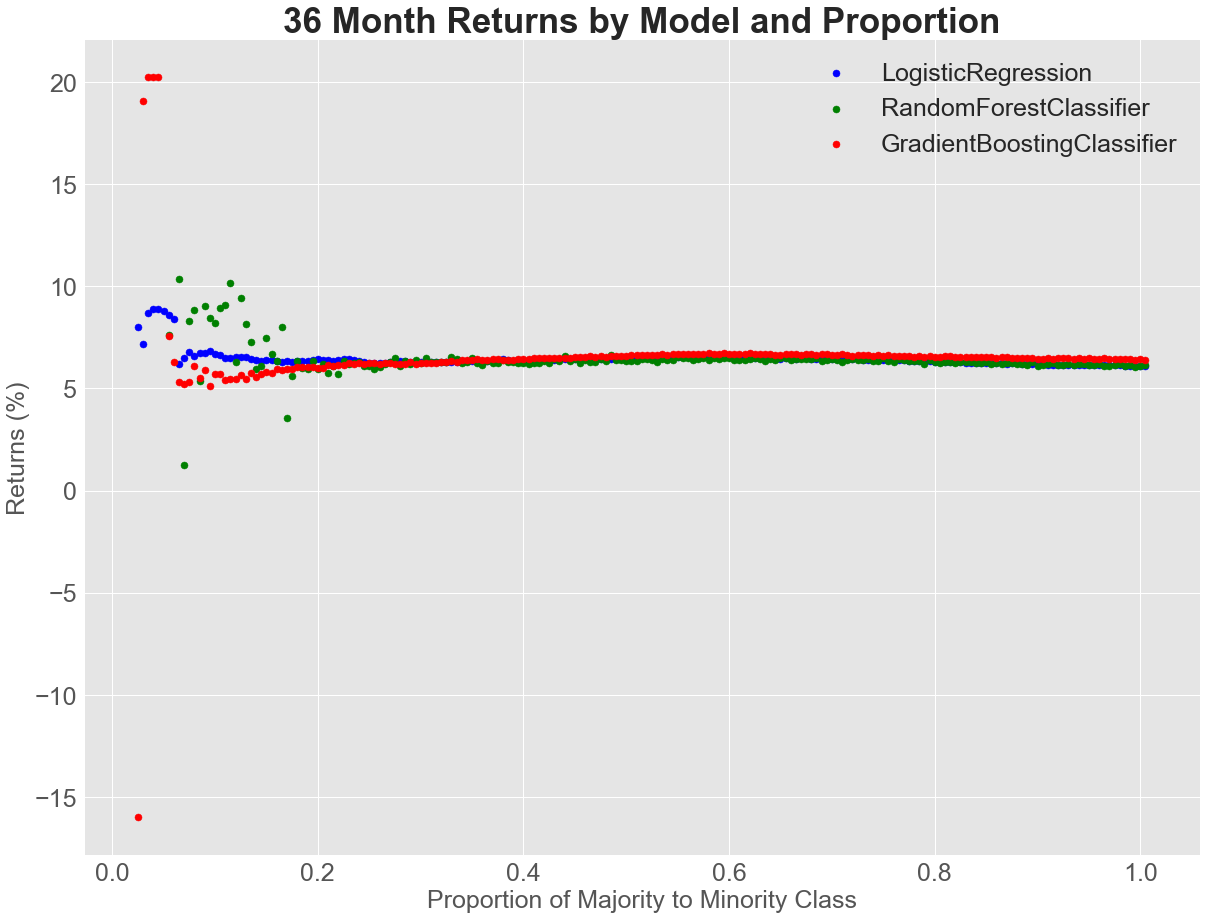

In [167]:
LCP.plot_36m_returns(combined)

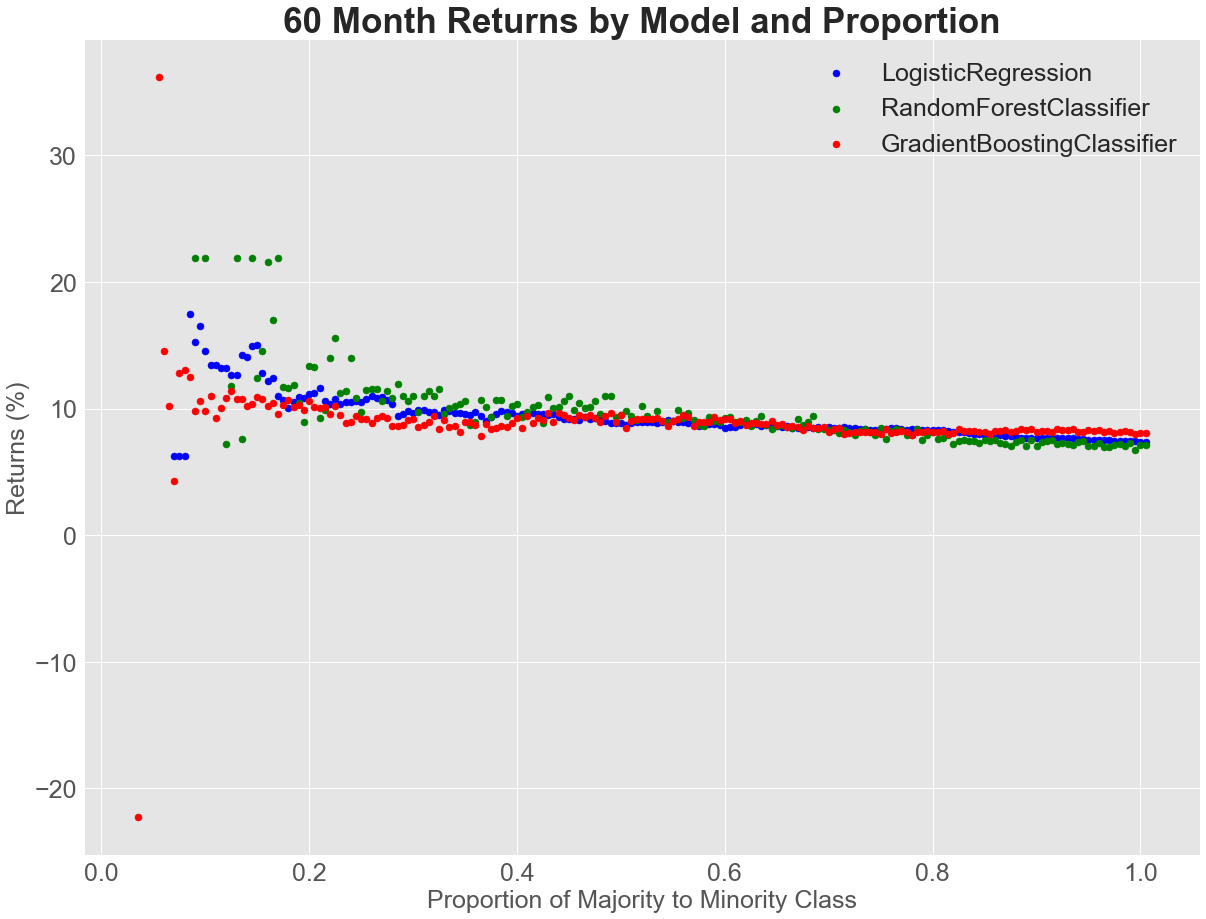

In [168]:
LCP.plot_60m_returns(combined)

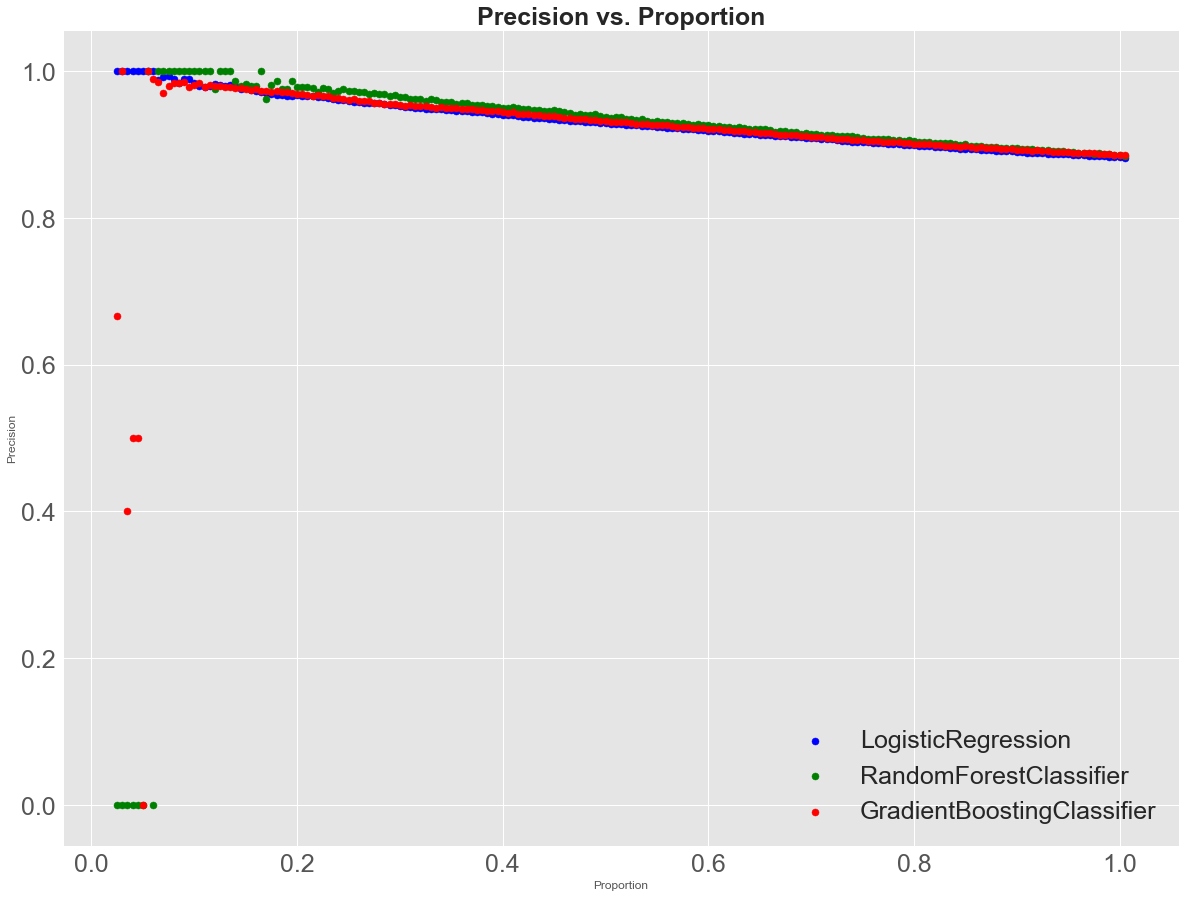

In [173]:
LCP.plot_prec_by_prop(combined)

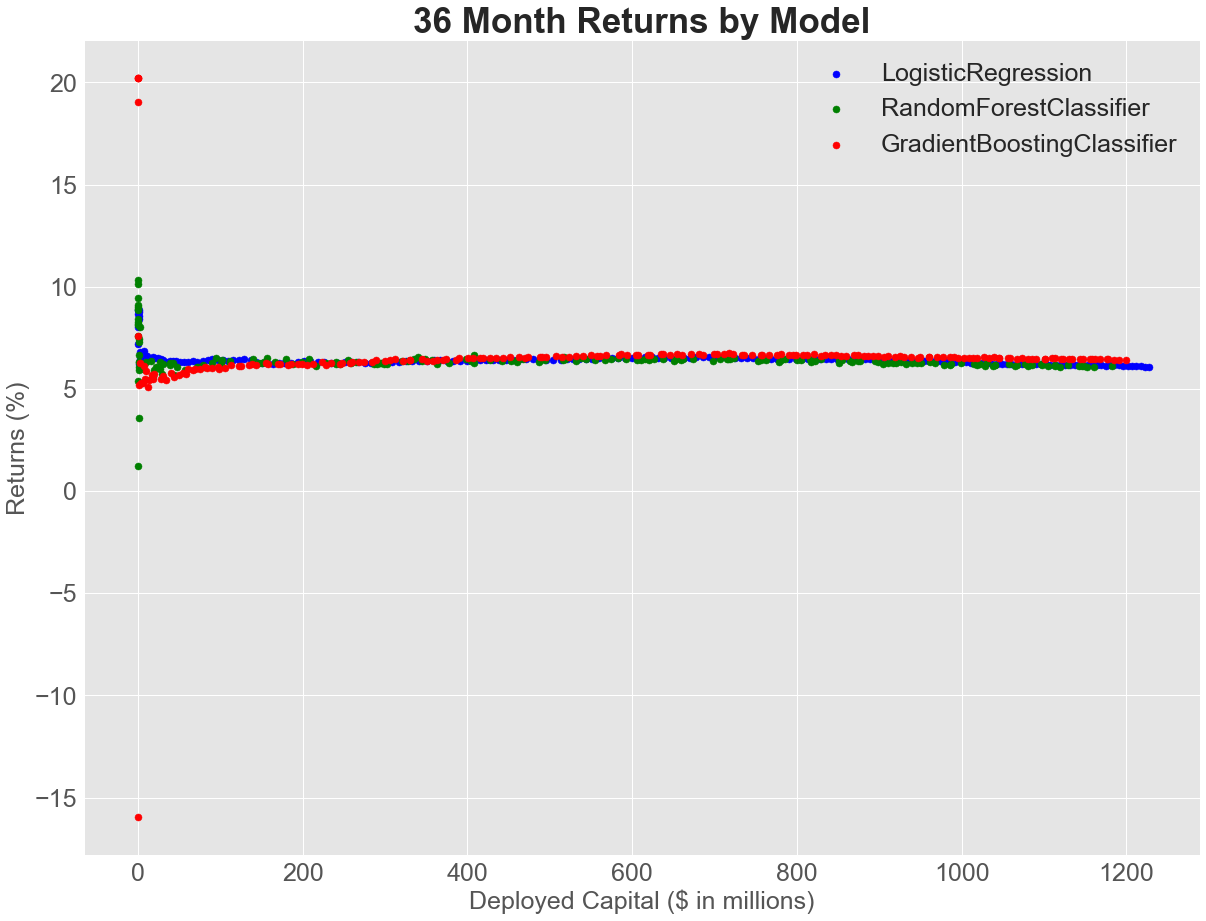

In [9]:
LCP.plot_36m_deployed(combined)

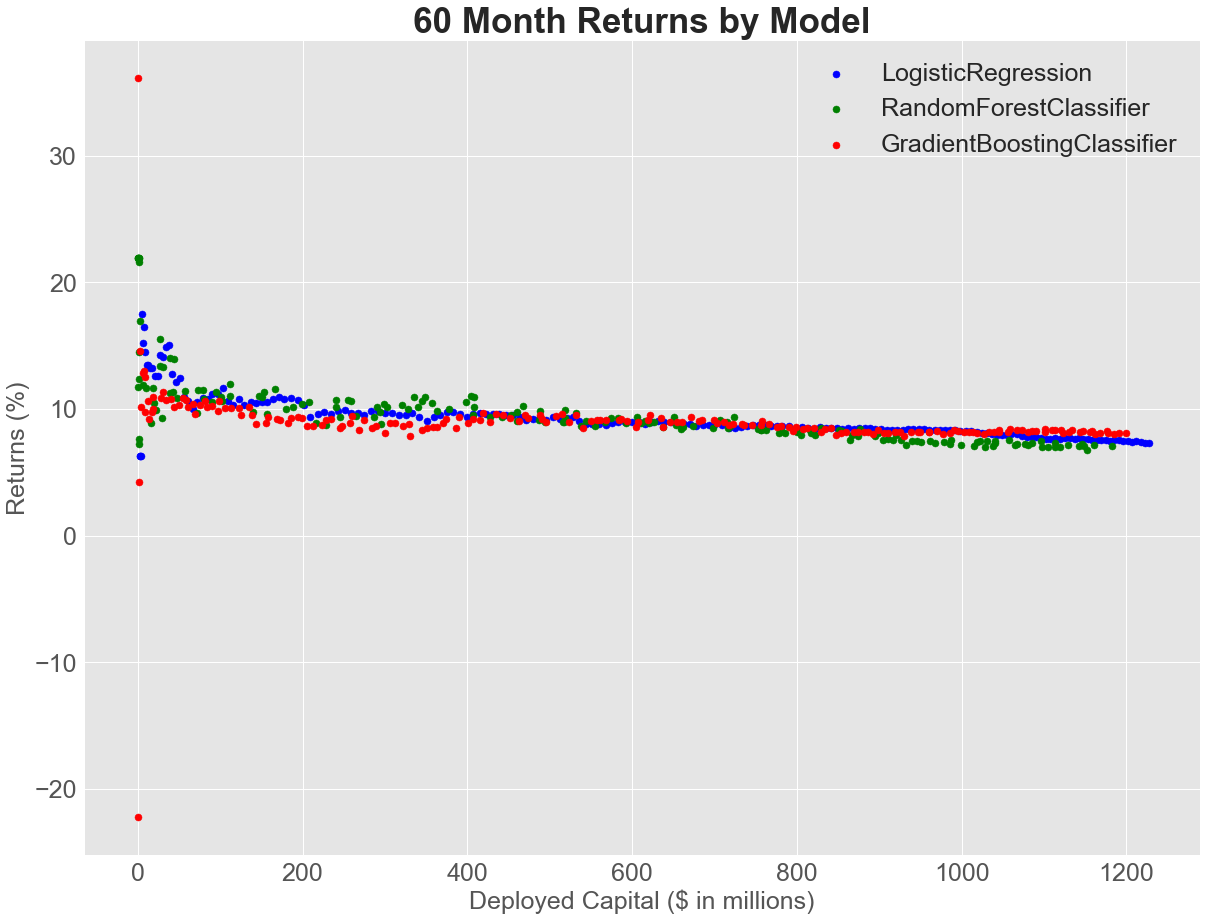

In [11]:
LCP.plot_60m_deployed(combined)

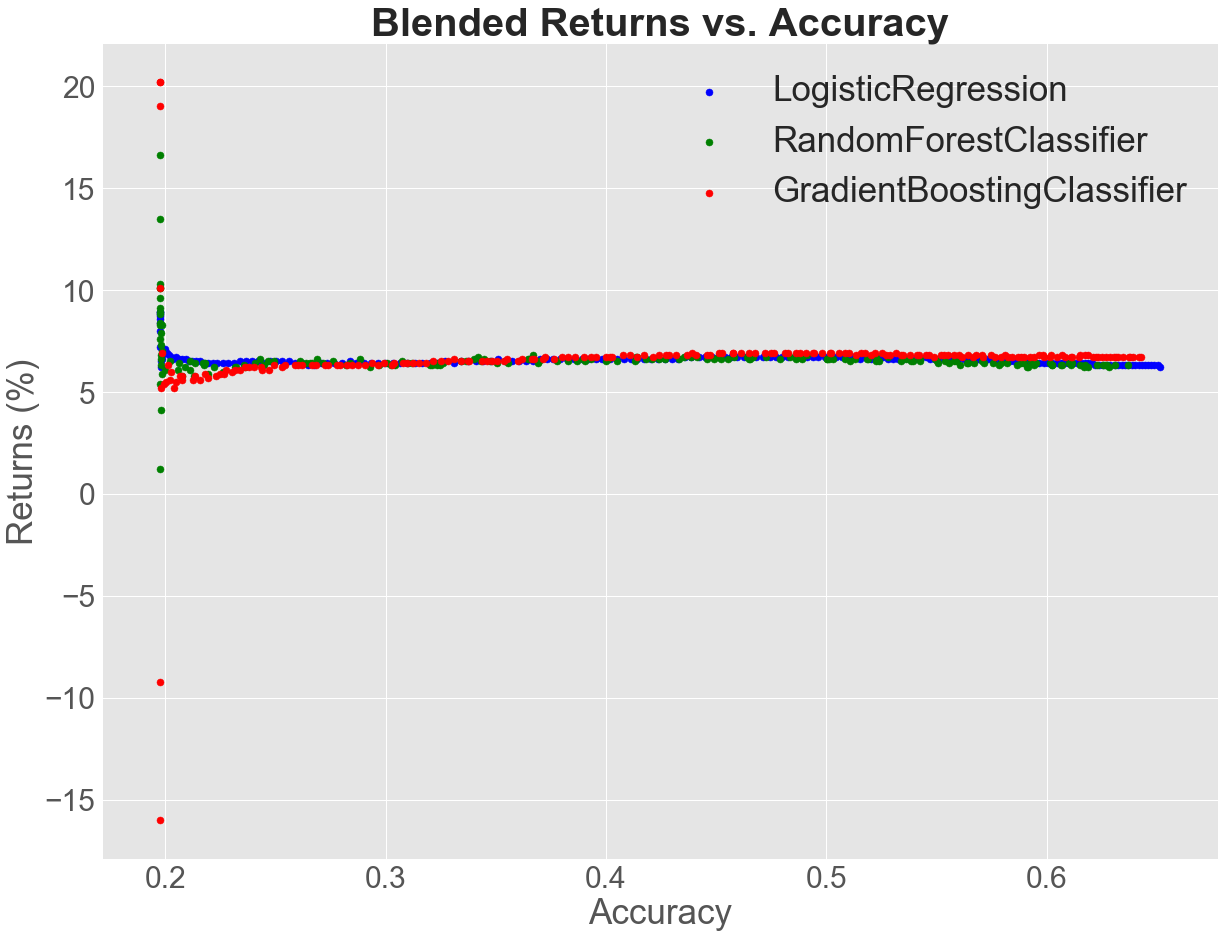

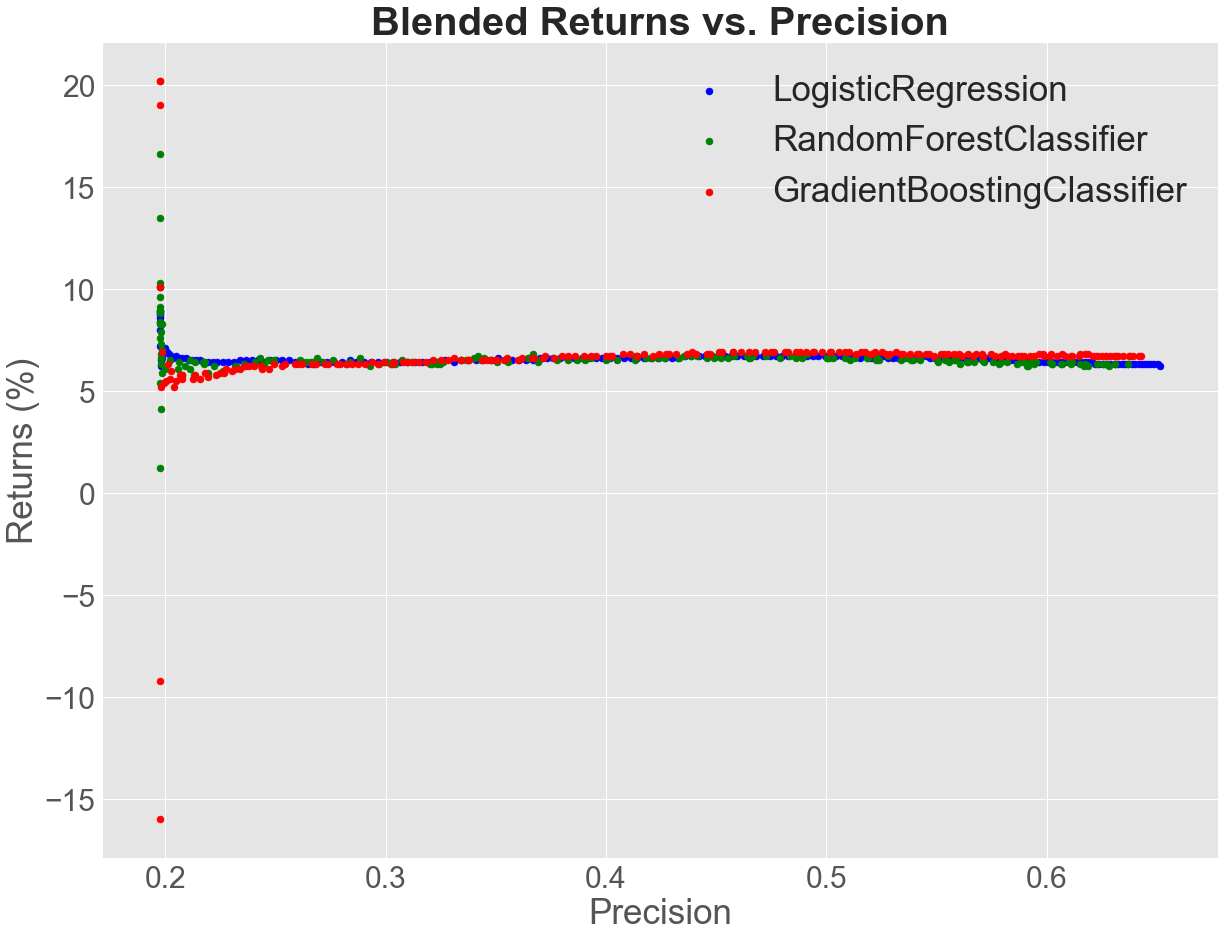

In [178]:
LCP.plot_rets_v_acc(combined)
LCP.plot_rets_v_prec(combined)

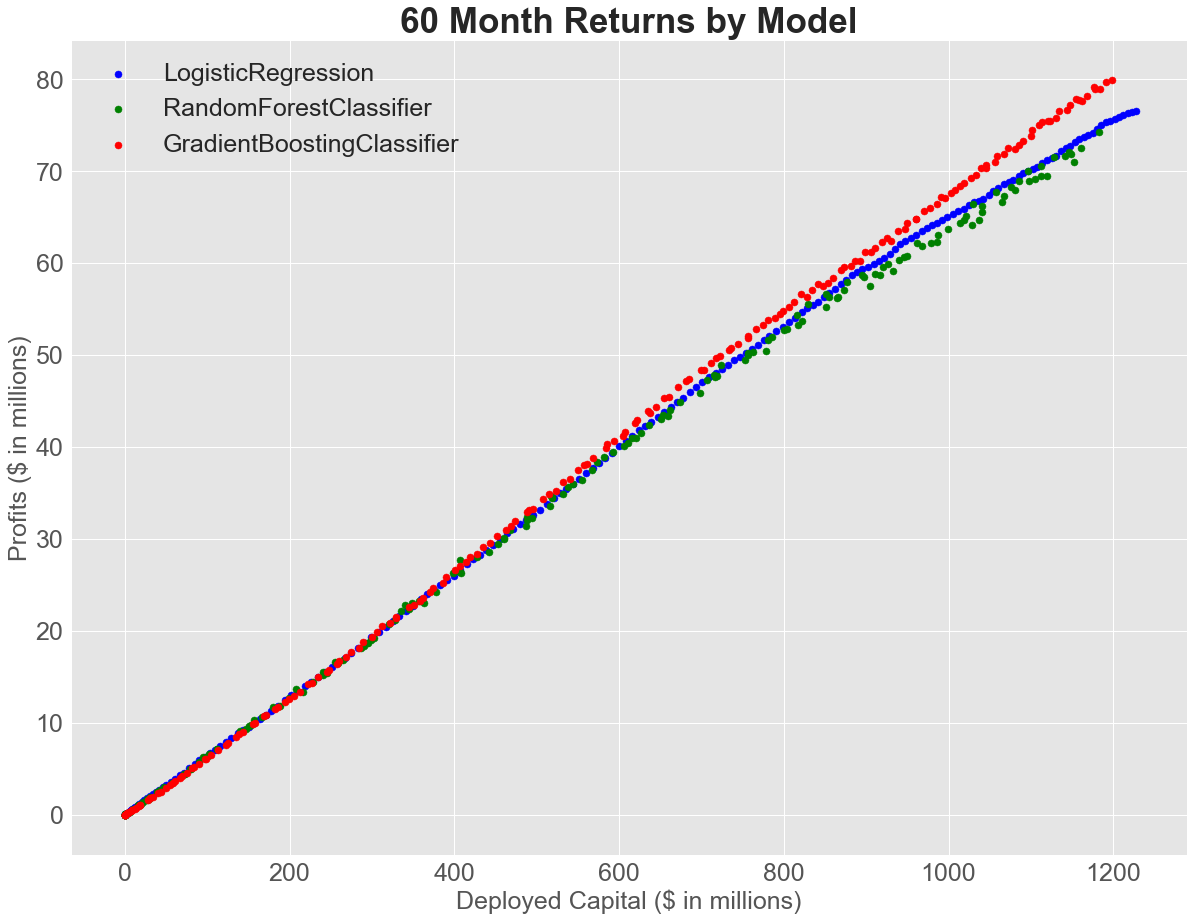

In [12]:
LCP.profits_v_deployed(combined)

In [ ]:
gbc_output_df['model'] = 'GradientBoostingClassifier'
gbc_output_df.to_csv('models/gbc_optimized.csv',index=False)

In [ ]:
gbc_df = pd.read_csv('models/gbc_optimized.csv')
rfc_df = pd.read_csv('models/rfc_optimized.csv')
log_df =  pd.read_csv('models/logm_optimized.csv')

In [ ]:
combined = pd.concat([log_df,rfc_df,gbc_df])

In [ ]:
combined

In [190]:
sharpe_matrix = LCT.get_sharpe_models(combined)

In [191]:
yields = [1.60, 1.63]


In [192]:
yields

[1.6, 1.63]

In [193]:
sharpe_matrix

,measure,model,Best_Params,Proportions
0,best,LogisticRegression,"{'C': 0.05, 'penalty': 'l1'}",0.045
1,36m,LogisticRegression,"{'C': 0.55, 'penalty': 'l1'}",0.040
2,60m,LogisticRegression,"{'C': 0.05, 'penalty': 'l1'}",0.085
0,best,RandomForestClassifier,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",0.090
1,36m,RandomForestClassifier,"{'max_depth': 8, 'max_features': 'auto', 'min_...",0.065
2,60m,RandomForestClassifier,"{'max_depth': 8, 'max_features': 'auto', 'min_...",0.170
0,best,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_features': 'auto',...",0.045
1,36m,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_features': 'auto',...",0.045
2,60m,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_features': 'auto',...",0.055


In [217]:
imp.reload(LCM)
sharpe_optimized = LCM.calculate_sharpe_ratios(pca_df,sharpe_matrix,1.00,yields[0],yields[1])


Running iteration: 1
Running iteration: 2
Running iteration: 3
Running iteration: 4
Running iteration: 5
Running iteration: 6
Running iteration: 7
Running iteration: 8
Running iteration: 9
Running iteration: 10
Running iteration: 11
Running iteration: 12
Running iteration: 13
Running iteration: 14
Running iteration: 15
Running iteration: 16
Running iteration: 17
Running iteration: 18
Running iteration: 19
Running iteration: 20
Running iteration: 21
Running iteration: 22
Running iteration: 23
Running iteration: 24
Running iteration: 25
Running iteration: 26
Running iteration: 27
Running iteration: 28
Running iteration: 29
Running iteration: 30
Running iteration: 31
Running iteration: 32
Running iteration: 33
Running iteration: 34
Running iteration: 35
Running iteration: 36
Running iteration: 37
Running iteration: 38
Running iteration: 39
Running iteration: 40
Running iteration: 41
Running iteration: 42
Running iteration: 43
Running iteration: 44
Running iteration: 45
Running iteration: 

Running iteration: 2
Running iteration: 3
Running iteration: 4
Running iteration: 5
Running iteration: 6
Running iteration: 7
Running iteration: 8
Running iteration: 9
Running iteration: 10
Running iteration: 11
Running iteration: 12
Running iteration: 13
Running iteration: 14
Running iteration: 15
Running iteration: 16
Running iteration: 17
Running iteration: 18
Running iteration: 19
Running iteration: 20
Running iteration: 21
Running iteration: 22
Running iteration: 23
Running iteration: 24
Running iteration: 25
Running iteration: 26
Running iteration: 27
Running iteration: 28
Running iteration: 29
Running iteration: 30
Running iteration: 31
Running iteration: 32
Running iteration: 33
Running iteration: 34
Running iteration: 35
Running iteration: 36
Running iteration: 37
Running iteration: 38
Running iteration: 39
Running iteration: 40
Running iteration: 41
Running iteration: 42
Running iteration: 43
Running iteration: 44
Running iteration: 45
Running iteration: 46
Running iteration:

In [233]:
sharpe_optimized

,Model_list,Proportions,Parameters,Return_List,Return36_List,Return60_List,Deployed_Capital,Deployed_Capital_36,Deployed_Capital_60
0,LogisticRegression___best,0.045,"{'C': 0.05, 'penalty': 'l1'}","[7.1701, 6.5413, 8.8031, 7.5516, 9.1872, 4.953...","[7.1701, 6.4781, 8.8031, 7.4207, 9.1872, 4.408...","[nan, 7.5262, nan, 11.3867, nan, 16.2154, nan,...","[486350.0, 962025.0, 500600.0, 545700.0, 59187...","[486350.0, 904025.0, 500600.0, 527700.0, 59187...","[0.0, 58000.0, 0.0, 18000.0, 0.0, 46000.0, 0.0..."
1,LogisticRegression___36m,0.040,"{'C': 0.55, 'penalty': 'l1'}","[-0.251, 8.0158, 9.8374, 8.9016, 10.8287, 3.42...","[-0.251, 8.3549, 9.8374, 8.9016, 11.5463, 1.31...","[nan, 1.487, nan, nan, 1.487, 43.1373, nan, 16...","[338425.0, 708725.0, 643850.0, 286550.0, 49062...","[338425.0, 673725.0, 643850.0, 286550.0, 45562...","[0.0, 35000.0, 0.0, 0.0, 35000.0, 24000.0, 0.0..."
2,LogisticRegression___60m,0.085,"{'C': 0.05, 'penalty': 'l1'}","[6.3833, 7.2216, 6.7383, 6.9495, 6.5433, 6.647...","[6.1367, 6.9325, 6.752, 6.7957, 6.3257, 6.5585...","[15.1613, 17.5624, 6.2258, 13.7354, 36.2072, 1...","[3439450.0, 3934750.0, 3758125.0, 3926300.0, 4...","[3345450.0, 3827750.0, 3660125.0, 3839300.0, 4...","[94000.0, 107000.0, 98000.0, 87000.0, 35000.0,..."
3,RandomForestClassifier___best,0.090,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,RandomForestClassifier___36m,0.065,"{'max_depth': 8, 'max_features': 'auto', 'min_...","[nan, nan, nan, nan, nan, nan, nan, 6.5497, na...","[nan, nan, nan, nan, nan, nan, nan, 6.5497, na...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 75000.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 75000.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,RandomForestClassifier___60m,0.170,"{'max_depth': 8, 'max_features': 'auto', 'min_...","[6.4462, 5.234, 7.1245, 6.727, 5.8487, 4.275, ...","[6.463, 5.1332, 7.146, 6.727, 5.8388, 4.275, 7...","[3.6114, 10.5669, 5.4519, nan, 9.569, nan, nan...","[6082775.0, 12206025.0, 2803900.0, 919625.0, 5...","[6046775.0, 11979425.0, 2768400.0, 919625.0, 5...","[36000.0, 226600.0, 35500.0, 0.0, 15400.0, 0.0..."
6,GradientBoostingClassifier___best,0.045,"{'learning_rate': 0.1, 'max_features': 'auto',...","[nan, nan, 12.4368, nan, nan, nan, nan, 23.132...","[nan, nan, 12.4368, nan, nan, nan, nan, 23.132...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 8300.0, 0.0, 0.0, 0.0, 0.0, 5600.0,...","[0.0, 0.0, 8300.0, 0.0, 0.0, 0.0, 0.0, 5600.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,GradientBoostingClassifier___36m,0.045,"{'learning_rate': 0.1, 'max_features': 'auto',...","[nan, -77.4863, nan, nan, nan, nan, nan, nan, ...","[nan, -77.4863, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, 31.01...","[0.0, 32000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3...","[0.0, 32000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35000..."
8,GradientBoostingClassifier___60m,0.055,"{'learning_rate': 0.1, 'max_features': 'auto',...","[5.6343, 5.6749, 7.6508, 9.4724, 2.2135, 6.602...","[5.6343, 5.6451, 6.8819, 8.2658, 5.6882, 7.179...","[nan, 6.9613, 15.2125, 12.5812, -4.2114, 4.340...","[31000.0, 476575.0, 390050.0, 53650.0, 284900....","[31000.0, 465775.0, 354050.0, 38650.0, 184900....","[0.0, 10800.0, 36000.0, 15000.0, 100000.0, 400..."


In [234]:
sharpe_large

,Model_list,Proportions,Parameters,Return_List,Return36_List,Return60_List,Deployed_Capital,Deployed_Capital_36,Deployed_Capital_60
0,LogisticRegression___0.664173284077181,0.025,"{'C': 0.3, 'penalty': 'l1'}","[3.2553, 3.2553, 10.3363, 10.3363, 10.1168, 10...","[3.2553, 10.3363, 10.046, 6.9978, 7.969, 7.745...","[nan, nan, 11.3867, nan, nan, nan, nan, nan, n...","[75000.0, 111600.0, 340600.0, 252950.0, 185000...","[75000.0, 111600.0, 322600.0, 252950.0, 185000...","[0.0, 0.0, 18000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
1,LogisticRegression___0.8651897212597883,0.025,"{'C': 0.05, 'penalty': 'l1'}","[9.7578, 9.7578, 7.9453, 7.9453, 12.6369, 12.6...","[9.7578, 7.9453, 12.6369, 6.0876, 9.3625, 11.2...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[77000.0, 241000.0, 97000.0, 107775.0, 137900....","[77000.0, 241000.0, 97000.0, 107775.0, 137900....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,LogisticRegression___0.7779609645072882,0.025,"{'C': 0.25, 'penalty': 'l1'}","[9.3446, 9.3446, 11.0852, 11.0852, 8.7967, 8.7...","[9.3446, 11.0852, 8.7967, -2.4382, 9.0144, 7.3...","[nan, nan, nan, nan, nan, 4.3402, nan, nan, na...","[336000.0, 235200.0, 78000.0, 347975.0, 204125...","[336000.0, 235200.0, 78000.0, 347975.0, 204125...","[0.0, 0.0, 0.0, 0.0, 0.0, 40000.0, 0.0, 0.0, 0..."
3,RandomForestClassifier___0.9041508177032133,0.025,"{'max_depth': 8, 'max_features': 'auto', 'min_...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,RandomForestClassifier___0.4246882493740819,0.025,"{'max_depth': 8, 'max_features': 'auto', 'min_...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,RandomForestClassifier___0.6792084409153447,0.025,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, 1.237, nan, nan...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40000.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40000.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,GradientBoostingClassifier___0.5435033206117348,0.025,"{'learning_rate': 0.1, 'max_features': 'auto',...","[7.1844, 7.1844, 5.2393, 5.2393, 7.3867, 7.386...","[10.6344, 11.8684, 10.3112, 3.5965, 2.7972, 6....","[-1.6775, -7.582, 0.4406, 4.4101, -8.8583, 22....","[881825.0, 610075.0, 612250.0, 808600.0, 68702...","[634725.0, 402150.0, 430850.0, 571375.0, 53535...","[247100.0, 207925.0, 181400.0, 237225.0, 15167..."


In [235]:
imp.reload(LCM)
sharpe_large = LCM.sharpe_models_large_p(pca_df,combined,1.00,yields[0],yields[1])


Running iteration: 1
Running iteration: 2
Running iteration: 3
Running iteration: 4
Running iteration: 5
Running iteration: 6
Running iteration: 7
Running iteration: 8
Running iteration: 9
Running iteration: 10
Running iteration: 11
Running iteration: 12
Running iteration: 13
Running iteration: 14
Running iteration: 15
Running iteration: 16
Running iteration: 17
Running iteration: 18
Running iteration: 19
Running iteration: 20
Running iteration: 21
Running iteration: 22
Running iteration: 23
Running iteration: 24
Running iteration: 25
Running iteration: 26
Running iteration: 27
Running iteration: 28
Running iteration: 29
Running iteration: 30
Running iteration: 31
Running iteration: 32
Running iteration: 33
Running iteration: 34
Running iteration: 35
Running iteration: 36
Running iteration: 37
Running iteration: 38
Running iteration: 39
Running iteration: 40
Running iteration: 41
Running iteration: 42
Running iteration: 43
Running iteration: 44
Running iteration: 45
Running iteration: 

Running iteration: 50


Completed batch: GradientBoostingClassifier___0.5480350999843617
-------------------------------------
Running iteration: 1
Running iteration: 2
Running iteration: 3
Running iteration: 4
Running iteration: 5
Running iteration: 6
Running iteration: 7
Running iteration: 8
Running iteration: 9
Running iteration: 10
Running iteration: 11
Running iteration: 12
Running iteration: 13
Running iteration: 14
Running iteration: 15
Running iteration: 16
Running iteration: 17
Running iteration: 18
Running iteration: 19
Running iteration: 20
Running iteration: 21
Running iteration: 22
Running iteration: 23
Running iteration: 24
Running iteration: 25
Running iteration: 26
Running iteration: 27
Running iteration: 28
Running iteration: 29
Running iteration: 30
Running iteration: 31
Running iteration: 32
Running iteration: 33
Running iteration: 34
Running iteration: 35
Running iteration: 36
Running iteration: 37
Running iteration: 38
Running iteration: 39
Running iteration: 40
Ru

In [221]:
sharpe_optimized.to_csv('models/sharpe_optimized.csv',index=False)


In [239]:
sharpe_large.to_csv('models/sharpe_large_deployed.csv',index=False)

In [238]:
sharpe_large

,Model_list,Proportions,Parameters,Return_List,Return36_List,Return60_List,Deployed_Capital,Deployed_Capital_36,Deployed_Capital_60
0,LogisticRegression___0.9017689133975209,0.025,"{'C': 0.1, 'penalty': 'l1'}","[5.278, 5.278, 7.5915, 7.5915, 8.3746, 8.3746,...","[6.2286, 7.5915, 8.3746, 8.1221, 7.3352, 16.75...","[1.487, nan, nan, nan, nan, nan, nan, nan, nan...","[174575.0, 270150.0, 296575.0, 102300.0, 11070...","[139575.0, 270150.0, 296575.0, 102300.0, 11070...","[35000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
1,LogisticRegression___0.7150707196669293,0.025,"{'C': 0.05, 'penalty': 'l1'}","[1.3312, 1.3312, 9.0303, 9.0303, 7.7409, 7.740...","[1.3312, 9.0303, 8.8612, -5.9996, 8.4459, 10.9...","[nan, nan, 5.9455, 4.3402, nan, nan, 1.487, na...","[334600.0, 344700.0, 208200.0, 291000.0, 18457...","[334600.0, 344700.0, 128200.0, 251000.0, 18457...","[0.0, 0.0, 80000.0, 40000.0, 0.0, 0.0, 35000.0..."
2,LogisticRegression___0.8884298243367224,0.025,"{'C': 0.45, 'penalty': 'l1'}","[-1.3596, -1.3596, 11.3926, 11.3926, 8.193, 8....","[-1.3596, 11.3926, 8.193, 9.462, 8.6639, 9.866...","[nan, nan, nan, 1.487, nan, 7.5508, nan, nan, ...","[311000.0, 90575.0, 324725.0, 416775.0, 338600...","[311000.0, 90575.0, 324725.0, 381775.0, 338600...","[0.0, 0.0, 0.0, 35000.0, 0.0, 40000.0, 0.0, 0...."
3,RandomForestClassifier___0.6535740252111559,0.025,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, 1.8218, na...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40000.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40000.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,RandomForestClassifier___0.6393778134181557,0.025,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,RandomForestClassifier___0.8113238936433388,0.025,"{'max_depth': 8, 'max_features': 'auto', 'min_...","[nan, nan, nan, nan, nan, nan, nan, nan, 11.10...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, 11.1017, nan, nan, nan, n...","[0.0, 0.0, 0.0, 0.0, 25000.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 25000.0, 0.0, 0.0, 0.0, 0..."
6,GradientBoostingClassifier___0.5480350999843617,0.025,"{'learning_rate': 0.1, 'max_features': 'auto',...","[4.3537, 4.3537, 1.518, 1.518, 9.0209, 9.0209,...","[5.8052, 3.9621, 8.3899, -3.0191, 9.0175, -2.3...","[-0.7325, -14.1525, 12.2183, 26.2243, -10.8209...","[522500.0, 572525.0, 780250.0, 406250.0, 64347...","[406500.0, 495275.0, 651650.0, 306250.0, 58347...","[116000.0, 77250.0, 128600.0, 100000.0, 60000...."
7,GradientBoostingClassifier___0.6019204707422467,0.025,"{'learning_rate': 0.1, 'max_features': 'auto',...","[-4.6045, -4.6045, -0.3143, -0.3143, 5.5361, 5...","[5.7156, 9.0286, 5.0946, 7.2766, 4.7866, 1.433...","[-30.7565, -33.715, 6.9529, 0.1649, -6.6557, 3...","[576850.0, 788725.0, 644575.0, 672475.0, 93910...","[413625.0, 616325.0, 491425.0, 359125.0, 65192...","[163225.0, 172400.0, 153150.0, 313350.0, 28717..."
8,GradientBoostingClassifier___0.4655575839871361,0.025,"{'learning_rate': 0.1, 'max_features': 'auto',...","[8.7862, 8.7862, 2.7544, 2.7544, 8.7235, 8.723...","[7.9786, 0.1735, 6.1147, 5.4563, 4.5056, 4.752...","[14.476, 6.4344, 15.8812, 16.9216, -3.4736, 23...","[1126275.0, 577350.0, 863200.0, 625800.0, 5903...","[986275.0, 339350.0, 632625.0, 493800.0, 46380...","[140000.0, 238000.0, 230575.0, 132000.0, 12650..."


In [15]:
pca_df = pd.read_csv('data/pca_df.csv')

In [92]:
X_train, X_test, y_train, y_test, train_loan_data, test_loan_data = LCT.lc_balance_sets(pca_df,0.1)

In [107]:
imp.reload(LCN);

In [108]:
nn = LCN.Neural_Net(2,[16,16],['relu','relu'])
nn.set_params('adam','binary_crossentropy',50,1000)

In [109]:
nn.fit(X_train,y_train)

Train on 305617 samples
Epoch 1/50
305617/305617 [==============================] - 2s 7us/sample - loss: 0.4767 - binary_accuracy: 0.9059
Epoch 2/50
305617/305617 [==============================] - 1s 4us/sample - loss: 0.3552 - binary_accuracy: 0.9091
Epoch 3/50
305617/305617 [==============================] - 1s 4us/sample - loss: 0.3375 - binary_accuracy: 0.9091
Epoch 4/50
305617/305617 [==============================] - 1s 4us/sample - loss: 0.3255 - binary_accuracy: 0.9091
Epoch 5/50
305617/305617 [==============================] - 1s 4us/sample - loss: 0.3188 - binary_accuracy: 0.9091
Epoch 6/50
305617/305617 [==============================] - 1s 4us/sample - loss: 0.3153 - binary_accuracy: 0.9091
Epoch 7/50
305617/305617 [==============================] - 1s 4us/sample - loss: 0.3115 - binary_accuracy: 0.9091
Epoch 8/50
305617/305617 [==============================] - 1s 4us/sample - loss: 0.3085 - binary_accuracy: 0.9091
Epoch 9/50
305617/305617 [==============================

In [110]:
nn.evaluate(X_test,y_test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [111]:
nn.scores

[1.7718130392008937, 0.19538619]

In [112]:
preds = nn.predict(X_test,y_test)

In [147]:
y_preds = []
for j in list(preds.flatten()):
    if j >= preds.max() -0.001:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [148]:
confusion_matrix(y_test,y_preds)

array([[ 29779,    898],
       [108931,  17399]])

In [149]:
overall_return, deployed_capital, returned_capital, t_36_rets,t_36_deployed,t_36_pl,t_60_rets,t_60_deployed,t_60_pl = LCM.lc_evaluate_model(y_test,y_preds,test_loan_data)

In [150]:
print(overall_return, t_36_rets,t_60_rets)

6.5011 6.4418 9.0432


In [229]:
imp.reload(LCN)
for i in list(np.linspace(0.4,1.25,75)):
    X_train, X_test, y_train, y_test, train_loan_data, test_loan_data = LCT.lc_balance_sets(pca_df,i)
    print('Proportion: {}'.format(i))
    nn = LCN.Neural_Net(2,[100,100],['relu','relu'])
    nn.set_params('adam','binary_crossentropy',10,2000)
    nn.fit(X_train,y_train)
    preds = nn.predict(X_test,y_test)
    y_preds = []
    for j in list(preds.flatten()):
        if j >= 0.5:
            y_preds.append(1)
        else:
            y_preds.append(0)
    print('\n')
    print(confusion_matrix(y_test,y_preds))
    print('\n')
    overall_return, deployed_capital, returned_capital, t_36_rets,t_36_deployed,t_36_pl,t_60_rets,t_60_deployed,t_60_pl = LCM.lc_evaluate_model(y_test,y_preds,test_loan_data)
    print('Overall: {}'.format(overall_return))
    print('36 Month: {}'.format(t_36_rets))
    print('60 Month: {}'.format(t_60_rets))
    print('Deployed Capital: {}'.format(deployed_capital))
    print('================================================')
    print('\n')

IndentationError: expected an indented block (LC_NN.py, line 75)

In [186]:
imp.reload(LCN)
for i in list(np.linspace(0.3,1.25,50)):
    X_train, X_test, y_train, y_test, train_loan_data, test_loan_data = LCT.lc_balance_sets(pca_df,i)
    print('Proportion: {}'.format(i))
    nn = LCN.Neural_Net(5,[100,100,100,100,100],['relu','relu','relu','relu','relu'])
    nn.set_params('adam','binary_crossentropy',10,2000)
    nn.fit(X_train,y_train)
    preds = nn.predict(X_test,y_test)
    y_preds = []
    for j in list(preds.flatten()):
        if j >= 0.5:
            y_preds.append(1)
        else:
            y_preds.append(0)
    print('\n')
    print(confusion_matrix(y_test,y_preds))
    print('\n')
    overall_return, deployed_capital, returned_capital, t_36_rets,t_36_deployed,t_36_pl,t_60_rets,t_60_deployed,t_60_pl = LCM.lc_evaluate_model(y_test,y_preds,test_loan_data)
    print('Overall: {}'.format(overall_return))
    print('36 Month: {}'.format(t_36_rets))
    print('60 Month: {}'.format(t_60_rets))
    print('Deployed Capital: {}'.format(deployed_capital))
    print('================================================')
    print('\n')

Proportion: 0.3
Train on 361129 samples
Epoch 1/10
361129/361129 [==============================] - 6s 16us/sample - loss: 0.6355 - binary_accuracy: 0.7686
Epoch 2/10
361129/361129 [==============================] - 5s 13us/sample - loss: 0.5675 - binary_accuracy: 0.7692
Epoch 3/10
361129/361129 [==============================] - 5s 13us/sample - loss: 0.5598 - binary_accuracy: 0.7692
Epoch 4/10
361129/361129 [==============================] - 5s 13us/sample - loss: 0.5553 - binary_accuracy: 0.7692
Epoch 5/10
361129/361129 [==============================] - 5s 14us/sample - loss: 0.5528 - binary_accuracy: 0.7692
Epoch 6/10
361129/361129 [==============================] - 5s 13us/sample - loss: 0.5510 - binary_accuracy: 0.7692
Epoch 7/10
361129/361129 [==============================] - 5s 13us/sample - loss: 0.5495 - binary_accuracy: 0.7692
Epoch 8/10
361129/361129 [==============================] - 5s 13us/sample - loss: 0.5482 - binary_accuracy: 0.7692
Epoch 9/10
361129/361129 [======

Proportion: 0.4163265306122449
Train on 393320 samples
Epoch 1/10
393320/393320 [==============================] - 6s 16us/sample - loss: 0.6697 - binary_accuracy: 0.7049
Epoch 2/10
393320/393320 [==============================] - 5s 13us/sample - loss: 0.6218 - binary_accuracy: 0.7061
Epoch 3/10
393320/393320 [==============================] - 5s 13us/sample - loss: 0.6170 - binary_accuracy: 0.7061
Epoch 4/10
393320/393320 [==============================] - 5s 13us/sample - loss: 0.6140 - binary_accuracy: 0.7061
Epoch 5/10
393320/393320 [==============================] - 5s 14us/sample - loss: 0.6118 - binary_accuracy: 0.7061
Epoch 6/10
393320/393320 [==============================] - 5s 13us/sample - loss: 0.6105 - binary_accuracy: 0.7061
Epoch 7/10
393320/393320 [==============================] - 6s 14us/sample - loss: 0.6094 - binary_accuracy: 0.7061
Epoch 8/10
393320/393320 [==============================] - 5s 14us/sample - loss: 0.6086 - binary_accuracy: 0.7061
Epoch 9/10
393320

Proportion: 0.5326530612244897
Train on 425777 samples
Epoch 1/10
425777/425777 [==============================] - 7s 16us/sample - loss: 0.6924 - binary_accuracy: 0.6523
Epoch 2/10
425777/425777 [==============================] - 6s 14us/sample - loss: 0.6548 - binary_accuracy: 0.6525
Epoch 3/10
425777/425777 [==============================] - 6s 14us/sample - loss: 0.6514 - binary_accuracy: 0.6525
Epoch 4/10
425777/425777 [==============================] - 6s 14us/sample - loss: 0.6495 - binary_accuracy: 0.6525
Epoch 5/10
425777/425777 [==============================] - 6s 14us/sample - loss: 0.6482 - binary_accuracy: 0.6525
Epoch 6/10
425777/425777 [==============================] - 6s 13us/sample - loss: 0.6472 - binary_accuracy: 0.6525
Epoch 7/10
425777/425777 [==============================] - 6s 13us/sample - loss: 0.6465 - binary_accuracy: 0.6525
Epoch 8/10
425777/425777 [==============================] - 6s 14us/sample - loss: 0.6460 - binary_accuracy: 0.6525
Epoch 9/10
425777

KeyboardInterrupt: 